In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import  tensorflow as tf
import tensorflow.keras as k
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Data Preprocessing

In [ ]:
# Define the path to the dataset directory
path = "/kaggle/input/real-doppler-raddar-database/data/"

# Initialize lists to store data and labels
car = []  # List to store car data
x = []    # Combined data for all categories (features)
y = []    # Combined labels for all categories (targets)

# Process the "Cars" directory
file = os.listdir(path + 'Cars/')  # List all subdirectories in the "Cars" folder
# Loop through each subdirectory
for i in file:
    f = os.listdir(path + 'Cars/' + i)  # List all files in the current subdirectory
    for j in f:
        # Read the CSV file as a DataFrame and convert to NumPy array
        p = pd.read_csv(path + "Cars/" + i + "/" + j, header=None)
        p = p.to_numpy()
        car.append(p)  # Append to the car-specific list
        x.append(p)    # Append to the combined data list
        d = [1, 0, 0]  # Label for cars
        y.append(d)    # Append the label to the labels list
print("done car")

# Initialize a list to store drone data
drone = []

# Process the "Drones" directory
file = os.listdir(path + 'Drones/')  # List all subdirectories in the "Drones" folder
for i in file:
    f = os.listdir(path + 'Drones/' + i)  # List all files in the current subdirectory
    for j in f:
        # Read the CSV file as a DataFrame and convert to NumPy array
        p = pd.read_csv(path + "Drones/" + i + "/" + j, header=None)
        p = p.to_numpy()
        drone.append(p)  # Append to the drone-specific list
        x.append(p)      # Append to the combined data list
        d = [0, 1, 0]    # Label for drones
        y.append(d)      # Append the label to the labels list
print("done drone")

# Initialize a list to store people data
people = []

# Process the "People" directory
file = os.listdir(path + 'People/')  # List all subdirectories in the "People" folder
for i in file:
    f = os.listdir(path + 'People/' + i)  # List all files in the current subdirectory
    for j in f:
        # Read the CSV file as a DataFrame and convert to NumPy array
        p = pd.read_csv(path + "People/" + i + "/" + j, header=None)
        p = p.to_numpy()
        people.append(p)  # Append to the people-specific list
        x.append(p)       # Append to the combined data list
        d = [0, 0, 1]     # Label for people
        y.append(d)       # Append the label to the labels list
print("done people")


done car
done drone
done people


In [ ]:
r=np.save('input',x)

In [ ]:
s=np.save('ground truth',y)

In [ ]:
x=np.absolute(x)


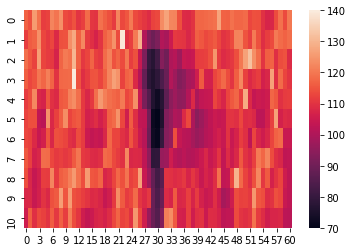

In [ ]:
car=np.asarray(car)
np.shape(car)
car=np.absolute(car)
drone=np.absolute(drone)
people=np.absolute(people)
import seaborn as sns
ax = sns.heatmap(car[600],vmin=70,vmax=140)

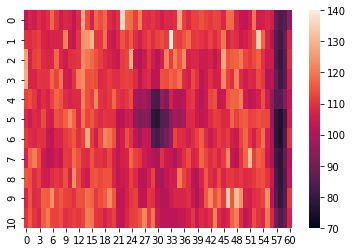

In [ ]:
ay=sns.heatmap(people[500],vmin=70,vmax=140)

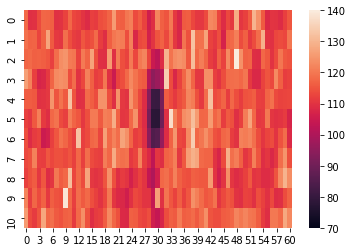

In [ ]:
ay=sns.heatmap(drone[500],vmin=70,vmax=140)

In [ ]:
np.shape(x)

(17485, 11, 61)

In [ ]:
np.shape(y)

(17485, 3)

In [ ]:
print(y[0])

[1, 0, 0]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
# test_size=0.125 means 12.5% of the original training data will be used for validation
# This results in 70% training, 10% validation, and 20% testing of the total data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)


In [ ]:
# Convert training, testing, and validation data lists to NumPy arrays
# This ensures compatibility with machine learning models that require NumPy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Reshape the data to add an additional dimension for channels
# Assuming the input data has dimensions (11, 61) and needs to be reshaped to (11, 61, 1)
# The -1 automatically calculates the number of samples
x_train = np.reshape(x_train, [-1, 11, 61, 1])  # Reshape training data
x_test = np.reshape(x_test, [-1, 11, 61, 1])    # Reshape testing data
x_val = np.reshape(x_val, [-1, 11, 61, 1])      # Reshape validation data


In [ ]:
print(x_train.shape)# print training data length
print(x_val.shape)# print validation data length
print(x_test.shape)# print test data length

(12239, 11, 61, 1)
(1749, 11, 61, 1)
(3497, 11, 61, 1)


# Model Architecture

In [ ]:
'''In this code, we are building a novel Convolutional Neural Network (CNN) using Keras for multi-class classification (3 classes) car, people and drones.
The model starts with convolutional layers for feature extraction, followed by batch normalization and max-pooling to stabilize training and reduce spatial dimensions.
After the convolutional layers, we flatten the feature maps and use dense (fully connected) layers with dropout for regularization, ending with a softmax layer for probabilistic outputs.
Finally, we have compiled the model with categorical crossentropy as the loss function and Adam(adapyive) optimizer to train efficiently.'''
model = k.Sequential()
model.add(tf.keras.Input(shape=(11, 61, 1)))

# 1st Block: Convolution + BatchNorm + MaxPooling
model.add(k.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))#32 filters of size 3X3
model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))  # Reduces dimensionality

# 2nd Block: Convolution + BatchNorm + MaxPooling
model.add(k.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))#64 filters of size 3X3
model.add(k.layers.BatchNormalization())
model.add(k.layers.MaxPooling2D(pool_size=(2, 2)))

# 3rd Block: Convolution + BatchNorm
model.add(k.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))#128 filters of size 3X3
model.add(k.layers.BatchNormalization())

# Flatten before Dense layers
model.add(k.layers.Flatten())

# Fully Connected Layers + Dropout
model.add(k.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(k.layers.Dropout(0.5))#prevents overitting by randomly dropping 20 percent of the neurons

model.add(k.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(k.layers.Dropout(0.3))

# Output Layer
model.add(k.layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], )

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 11, 61, 32)        320       
_________________________________________________________________
batch_normalization_100 (Bat (None, 11, 61, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 30, 32)         0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 5, 30, 64)         18496     
_________________________________________________________________
batch_normalization_101 (Bat (None, 5, 30, 64)         256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 15, 64)         0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 2, 15, 128)       

In [ ]:
!pip install visualkeras

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


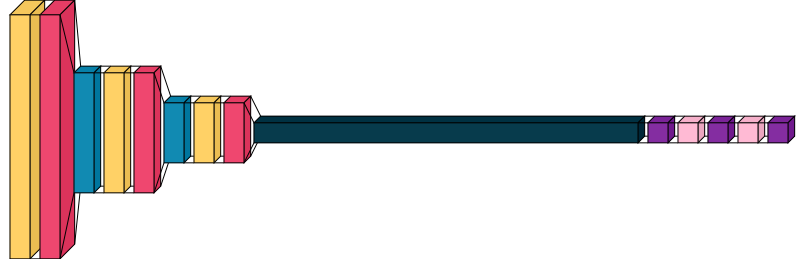

In [ ]:
import visualkeras#visualising the model
visualkeras.layered_view(model)

# Training and Evaluation

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)#if the error doesn't change for 12 epochs we stop
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
383/383 [==============================] - 2s 4ms/step - loss: 0.6960 - accuracy: 0.8633 - val_loss: 4.1644 - val_accuracy: 0.3408
Epoch 2/50
383/383 [==============================] - 1s 4ms/step - loss: 0.4504 - accuracy: 0.9307 - val_loss: 0.5027 - val_accuracy: 0.8845
Epoch 3/50
383/383 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.9439 - val_loss: 0.3153 - val_accuracy: 0.9405
Epoch 4/50
383/383 [==============================] - 1s 3ms/step - loss: 0.2961 - accuracy: 0.9493 - val_loss: 0.3242 - val_accuracy: 0.9285
Epoch 5/50
383/383 [==============================] - 1s 4ms/step - loss: 0.2521 - accuracy: 0.9553 - val_loss: 0.2506 - val_accuracy: 0.9514
Epoch 6/50
383/383 [==============================] - 1s 3ms/step - loss: 0.2224 - accuracy: 0.9595 - val_loss: 0.3044 - val_accuracy: 0.9308
Epoch 7/50
383/383 [==============================] - 1s 4ms/step - loss: 0.1922 - accuracy: 0.9645 - val_loss: 0.2211 - val_accuracy: 0.9508
Epoch 

In [ ]:
# Training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


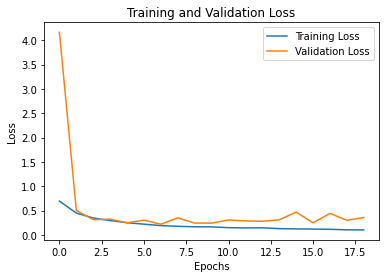

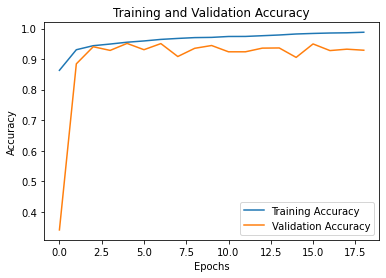

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
history.model.evaluate(x_test,y_test)

110/110 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.9511


[0.21550501883029938, 0.9511009454727173]

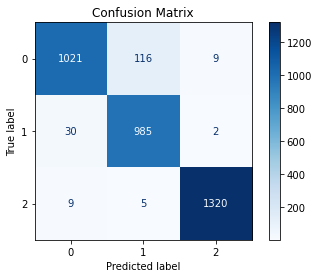

In [ ]:
y_pred=history.model.predict(x_test)#model prediction
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_classes))
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Compute precision, recall, and F1 scores
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
#print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9529733901517758
Recall: 0.9511009436659994
F1 Score: 0.9510998601377184


# Fine-tuning using different models

# MobileNetV2 

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
x_preprocessed = preprocess_input(x)

In [ ]:
from sklearn.model_selection import train_test_split
#70% training data, 20% test data, 10% validation
x_train,x_test,y_train,y_test=train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=42)


In [ ]:
print(x_train.shape)

(12239, 11, 61)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
'''The input data (originally 11x61x1) is resized to 224x224x3 to match MobileNetV2's input requirements by using a Lambda layer that both resizes and tiles the grayscale data into three channels.
The resized input then passes through the pre-trained MobileNetV2 layers (with ImageNet weights frozen to preserve feature extraction).
Afterward, a global average pooling layer reduces the feature maps, followed by a dropout layer to improve generalization. Finally, a softmax layer provides class probabilities for the three categories.
The model is compiled with categorical cross-entropy loss for multi-class classification and optimized with Adam for efficient training.'''
# Step 1: Load MobileNetV2 without the top layers
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False
# Step 2: Custom input layer with resizing and tiling logic
def resize_and_tile(inputs):
    resized = tf.image.resize(inputs, (224, 224))  # Resize (11, 61, 1) to (224, 224, 1)
    return tf.concat([resized] * 3, axis=-1)        # Tile to (224, 224, 3)

input_layer = layers.Input(shape=(11, 61, 1))
x = layers.Lambda(resize_and_tile)(input_layer)     # Use Lambda layer for custom resizing

# Step 3: Pass the data through the MobileNetV2 base
x = base_model(x, training=False)  # Keep pre-trained weights frozen initially
x = layers.GlobalAveragePooling2D()(x)  # Pooling layer to flatten the features
x = layers.Dropout(0.2)(x)  # Dropout for regularization
output_layer = layers.Dense(3, activation='softmax')(x)  # 3-class output with softmax

# Step 4: Define the final model
f_model = models.Model(inputs=input_layer, outputs=output_layer)

# Step 5: Compile the model with categorical_crossentropy for one-hot labels
f_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use this for one-hot encoded labels
    metrics=['accuracy']
)

f_model.summary()

9412608/9406464 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 11, 61, 1)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-train

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.batch(32).shuffle(buffer_size=1000) #batpch size trained in sizes of 32

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(32)

In [ ]:
history=f_model.fit(train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
383/383 [==============================] - 11s 29ms/step - loss: 0.7241 - accuracy: 0.6717 - val_loss: 0.5298 - val_accuracy: 0.7764
Epoch 2/50
383/383 [==============================] - 10s 26ms/step - loss: 0.5463 - accuracy: 0.7655 - val_loss: 0.4746 - val_accuracy: 0.8073
Epoch 3/50
383/383 [==============================] - 10s 26ms/step - loss: 0.5095 - accuracy: 0.7837 - val_loss: 0.4533 - val_accuracy: 0.8056
Epoch 4/50
383/383 [==============================] - 10s 26ms/step - loss: 0.4880 - accuracy: 0.7918 - val_loss: 0.4411 - val_accuracy: 0.8216
Epoch 5/50
383/383 [==============================] - 10s 26ms/step - loss: 0.4728 - accuracy: 0.7976 - val_loss: 0.4239 - val_accuracy: 0.8239
Epoch 6/50
383/383 [==============================] - 10s 26ms/step - loss: 0.4658 - accuracy: 0.8063 - val_loss: 0.4125 - val_accuracy: 0.8290
Epoch 7/50
383/383 [==============================] - 10s 26ms/step - loss: 0.4599 - accuracy: 0.8079 - val_loss: 0.4164 - val_accuracy:

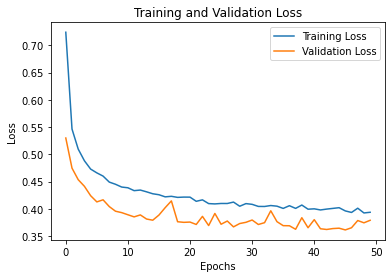

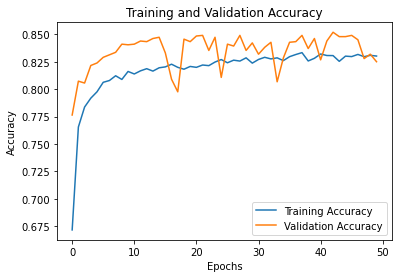

In [ ]:
# Training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_probs = f_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(y_true)
print(y_pred)


[2 2 0 ... 0 2 0]
[2 2 0 ... 0 2 0]


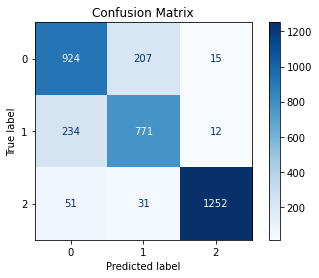

In [ ]:

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Compute precision, recall, and F1 scores
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
#print metrpics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8460975225754127
Recall: 0.8427223334286531
F1 Score: 0.8440602808975679


# GoogLeNet

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import tensorflow as tf
'''This model uses InceptionV3 to classify radar data into three classes by resizing the input to 299x299x3.
The pre-trained InceptionV3 model processes the data, with its weights frozen, followed by pooling, dropout, and a softmax output layer.
It is compiled with categorical cross-entropy loss and optimized using the Adam optimizer for training.'''
# Load InceptionV3 pre-trained model (exclude top layers)
base_model = InceptionV3(
    input_shape=(299, 299, 3),  # Input size for InceptionV3
    include_top=False,          # Exclude fully connected layers
    weights='imagenet'          # Load pre-trained weights from ImageNet
)

# Freeze the base model layers (no training on them)
base_model.trainable = False

# Define the input shape for the radar data
input_layer = layers.Input(shape=(11, 61, 1))

# Function to resize and tile the radar data (single channel to three channels)
def resizeandtile(inputs):
    resized = tf.image.resize(inputs, (299, 299))  # Resize input to (299, 299)
    return tf.concat([resized] * 3, axis=-1)        # Convert to 3 channels (RGB)

# Apply the resize and tile function to the input data
x = layers.Lambda(resizeandtile)(input_layer)

# Pass the processed input through the InceptionV3 model
x = base_model(x, training=False)

# Apply global average pooling to reduce dimensions
x = layers.GlobalAveragePooling2D()(x)

# Add a dropout layer to prevent overfitting
x = layers.Dropout(0.2)(x)

# Output layer with softmax activation for 3-class classification
output_layer = layers.Dense(3, activation='softmax')(x)

# Create the model with input and output layers
inception_model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model with Adam optimizer and categorical cross-entropy loss
inception_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Display the model summary
inception_model.summary()


87916544/87910968 [==============================] - 4s 0us/step
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 11, 61, 1)]       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 299, 299, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 6147      
Total params: 21,808,931
Trainable params: 6,147
Non-tr

In [ ]:
history=inception_model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/50
383/383 [==============================] - 32s 84ms/step - loss: 0.4913 - accuracy: 0.7917 - val_loss: 0.3453 - val_accuracy: 0.8736
Epoch 2/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3697 - accuracy: 0.8518 - val_loss: 0.3206 - val_accuracy: 0.8765
Epoch 3/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3392 - accuracy: 0.8641 - val_loss: 0.3158 - val_accuracy: 0.8685
Epoch 4/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3319 - accuracy: 0.8674 - val_loss: 0.3363 - val_accuracy: 0.8508
Epoch 5/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3170 - accuracy: 0.8725 - val_loss: 0.2873 - val_accuracy: 0.8862
Epoch 6/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3141 - accuracy: 0.8728 - val_loss: 0.2829 - val_accuracy: 0.8856
Epoch 7/50
383/383 [==============================] - 30s 78ms/step - loss: 0.3055 - accuracy: 0.8779 - val_loss: 0.3676 - val_accuracy:

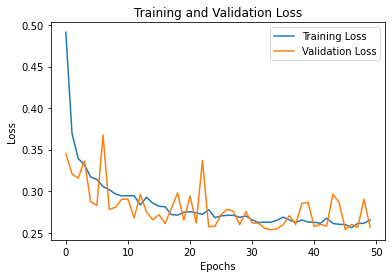

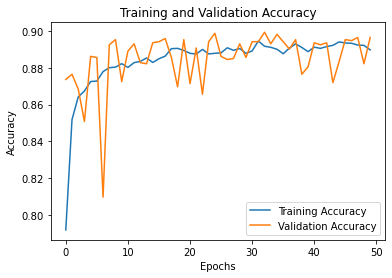

In [ ]:
# Training and validation loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_probs = inception_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
#print metrics
print("Accuracy = ",np.mean(y_pred==y_true))
print(y_true)
print(y_pred)

Accuracy =  0.885902201887332
[2 2 0 ... 0 2 0]
[2 2 1 ... 0 2 0]


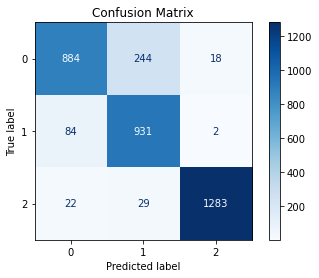

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Compute precision, recall, and F1 scores
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8931147576404006
Recall: 0.885902201887332
F1 Score: 0.8862618543705263
